In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [3]:
#Config information and query URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="

In [20]:
#lists to hold response info
temp = [] #weather_response['main']['temp']
latitude = [] #weather_response['coord']['lat']
humidity = [] #weather_response['main']['humidity']
cloudiness = [] #weather_response['clouds']['all']
wind_speed = [] #weather_response['wind']['speed']
city_list = [] #weather_response['name']
longitude = [] #weather_response['coord']['lon']

In [23]:
#loop and retrieve data for cities
for city in cities:
    weather_response = requests.get(query_url + city).json()
    
    try:
        print(f"Processing City: {city}")
        temp.append(weather_response['main']['temp'])
        latitude.append(weather_response['coord']['lat'])
        longitude.append(weather_response['coord']['lon'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        city_list.append(city)
    except KeyError:
        print: "City not found.. skipping" 

Processing City: yablonovo
Processing City: rikitea
Processing City: mount gambier
Processing City: lasa
Processing City: port alfred
Processing City: butaritari
Processing City: ballina
Processing City: caravelas
Processing City: hermanus
Processing City: zhanaozen
Processing City: iki-burul
Processing City: pevek
Processing City: hilo
Processing City: ouadda
Processing City: pangoa
Processing City: baoning
Processing City: vaini
Processing City: vuktyl
Processing City: punta arenas
Processing City: san cristobal
Processing City: esperance
Processing City: ushuaia
Processing City: jamestown
Processing City: brae
Processing City: atuona
Processing City: belmonte
Processing City: kungurtug
Processing City: katsuura
Processing City: emerald
Processing City: bihac
Processing City: tezu
Processing City: cherskiy
Processing City: mataura
Processing City: bethel
Processing City: saint-pierre
Processing City: carnarvon
Processing City: illoqqortoormiut
Processing City: khatanga
Processing Cit

Processing City: vrangel
Processing City: kruisfontein
Processing City: halifax
Processing City: the valley
Processing City: nichinan
Processing City: new norfolk
Processing City: nikel
Processing City: kiunga
Processing City: watsa
Processing City: atambua
Processing City: wampusirpi
Processing City: mullaitivu
Processing City: kalmunai
Processing City: aba
Processing City: satitoa
Processing City: luderitz
Processing City: souflion
Processing City: cleveland
Processing City: inhambane
Processing City: colquiri
Processing City: mar del plata
Processing City: rio grande
Processing City: los llanos de aridane
Processing City: meyungs
Processing City: padang
Processing City: homer
Processing City: toliary
Processing City: guerrero negro
Processing City: shelabolikha
Processing City: hagere hiywet
Processing City: lucapa
Processing City: manaure
Processing City: riyadh
Processing City: lata
Processing City: athabasca
Processing City: vreed en hoop
Processing City: payo
Processing City: lu

In [24]:
weather_df = pd.DataFrame({
    "City": city_list,
    "Temperature(F)": temp,
    "Latitude": latitude,
    "Longitude": longitude,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
})
weather_df

,City,Temperature(F),Latitude,Longitude,Humidity,Cloudiness,Wind Speed
0,yablonovo,64.08,50.8523,37.3574,75,57,6.33
1,rikitea,74.03,-23.1203,-134.9692,80,100,17.22
2,mount gambier,54.21,-37.8333,140.7667,58,100,13.42
3,lasa,62.37,46.6166,10.7002,88,6,1.74
4,port alfred,60.19,-33.5906,26.8910,86,55,5.01
...,...,...,...,...,...,...,...
556,am timan,71.01,11.0297,20.2827,95,100,11.56
557,katherine,89.92,-14.4667,132.2667,15,0,10.36
558,torrelavega,68.76,43.3494,-4.0479,85,0,1.99
559,itaituba,82.56,-4.2761,-55.9836,78,0,0.00


In [25]:
weather_df.to_csv('output_data\cities.csv')

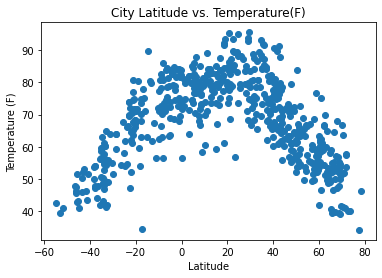

Code is analyzing the relationship between latitude and temperature. As latitude gets closer to 0, temperature increases.


In [26]:
#Latitude vs Temperature
plt.scatter(weather_df['Latitude'],weather_df['Temperature(F)'])
plt.title("City Latitude vs. Temperature(F)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.savefig('output_data/fig1.png')
plt.show()
print("Code is analyzing the relationship between latitude and temperature. As latitude gets closer to 0, temperature increases.")

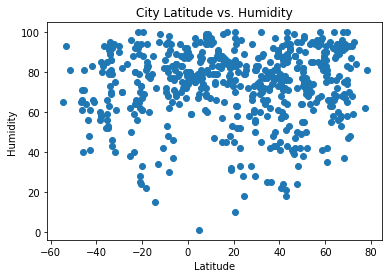

Code is analyzing the relationship between latitude and humidity. As latitude gets closer to 0, humidity tends to be at least above 40%, however latitudes higher and lower than 0 also have humidity above that value.


In [27]:
#Latitude vs Humidity
plt.scatter(weather_df['Latitude'],weather_df['Humidity'])
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig('output_data/fig2.png')
plt.show()
print("Code is analyzing the relationship between latitude and humidity. As latitude gets closer to 0, humidity tends to be at least above 40%, however latitudes higher and lower than 0 also have humidity above that value.")

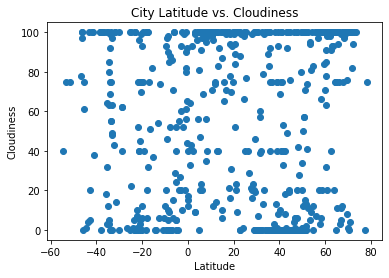

Code is analyzing latitude vs cloudiness, there is not a significant relationship between the two. 


In [28]:
#Latitude vs Cloudiness
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'])
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig('output_data/fig3.png')
plt.show()
print("Code is analyzing latitude vs cloudiness, there is not a significant relationship between the two. ")

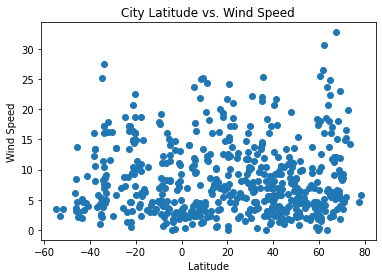

Code is analyzing latitude vs wind speed, there is not a significant relationship between the two. 


In [29]:
#Latitude vs Windspeed
plt.scatter(weather_df['Latitude'],weather_df['Wind Speed'])
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig('output_data/fig4.png')
plt.show()
print("Code is analyzing latitude vs wind speed, there is not a significant relationship between the two. ")

In [30]:
#Create northern and southern hemisphere dataframes
north_df = weather_df.loc[(weather_df['Latitude'] > 0),:]
south_df = weather_df.loc[(weather_df['Latitude'] < 0),:]

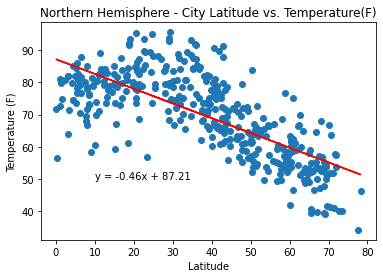

The r-value is: -0.7235835844483591
As city latitude gets further from 0, temperature decreases.


In [31]:
#Northern Hemisphere Latitude vs Temperature
plt.scatter(north_df['Latitude'],north_df['Temperature(F)'])
plt.title("Northern Hemisphere - City Latitude vs. Temperature(F)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Latitude'],north_df['Temperature(F)'])
regress_values = north_df['Latitude'] * slope + intercept
plt.plot(north_df['Latitude'], regress_values, "r-")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (10,50))
plt.savefig('output_data/fig5.png')
plt.show()
print(f"The r-value is: {rvalue}")
print("As city latitude gets further from 0, temperature decreases.")

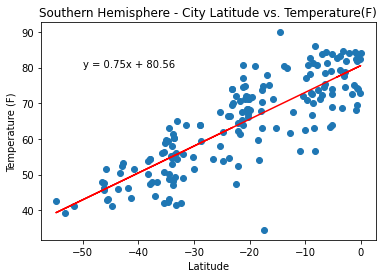

The r-value is: 0.8240191348720098
As city latitude gets closer to 0, temperature increases.


In [32]:
#Southern Hemisphere Latitude vs Temperature
plt.scatter(south_df['Latitude'],south_df['Temperature(F)'])
plt.title("Southern Hemisphere - City Latitude vs. Temperature(F)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Latitude'],south_df['Temperature(F)'])
regress_values = south_df['Latitude'] * slope + intercept
plt.plot(south_df['Latitude'], regress_values, "r-")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-50,80))
plt.savefig('output_data/fig6.png')
plt.show()
print(f"The r-value is: {rvalue}")
print("As city latitude gets closer to 0, temperature increases.")

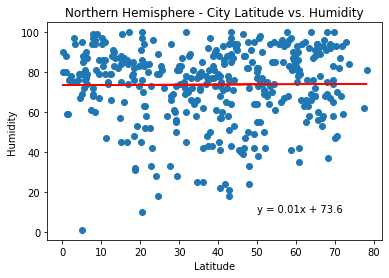

The r-value is: 0.005951095610453289
As city latitude gets further from 0, humidity increases.


In [33]:
#Northern Hemisphere Latitude vs Humidity
plt.scatter(north_df['Latitude'],north_df['Humidity'])
plt.title("Northern Hemisphere - City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Latitude'],north_df['Humidity'])
regress_values = north_df['Latitude'] * slope + intercept
plt.plot(north_df['Latitude'], regress_values, "r-")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (50,10))
plt.savefig('output_data/fig7.png')
plt.show()
print(f"The r-value is: {rvalue}")
print("As city latitude gets further from 0, humidity increases.")

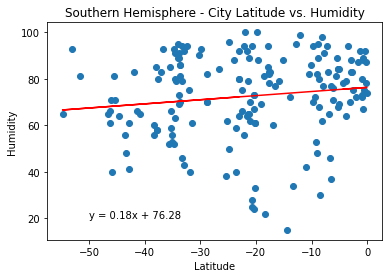

The r-value is: 0.13919785798204767
As city latitude gets closer 0, humidity increases.


In [34]:
#Southern Hemisphere Latitude vs Humidity
plt.scatter(south_df['Latitude'],south_df['Humidity'])
plt.title("Southern Hemisphere - City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Latitude'],south_df['Humidity'])
regress_values = south_df['Latitude'] * slope + intercept
plt.plot(south_df['Latitude'], regress_values, "r-")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-50,20))
plt.savefig('output_data/fig8.png')
plt.show()
print(f"The r-value is: {rvalue}")
print("As city latitude gets closer 0, humidity increases.")

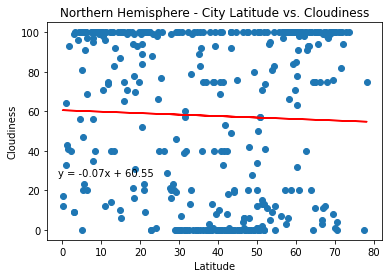

The r-value is: -0.036143337970667225
As city latitude gets further from 0, cloudiness decreases.


In [35]:
#Northern Hemisphere Latitude vs Cloudiness
plt.scatter(north_df['Latitude'],north_df['Cloudiness'])
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Latitude'],north_df['Cloudiness'])
regress_values = north_df['Latitude'] * slope + intercept
plt.plot(north_df['Latitude'], regress_values, "r-")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-1,27))
plt.savefig('output_data/fig9.png')
plt.show()
print(f"The r-value is: {rvalue}")
print("As city latitude gets further from 0, cloudiness decreases.")

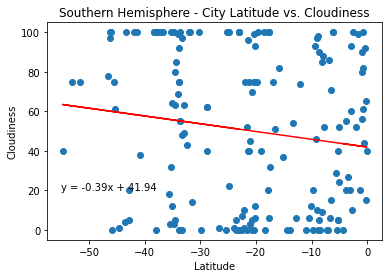

The r-value is: -0.14224420645691882
As city latitude gets closer to 0, cloudiness increases.


In [36]:
#Southern Hemisphere Latitude vs Cloudiness
plt.scatter(south_df['Latitude'],south_df['Cloudiness'])
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Latitude'],south_df['Cloudiness'])
regress_values = south_df['Latitude'] * slope + intercept
plt.plot(south_df['Latitude'], regress_values, "r-")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-55,20))
plt.savefig('output_data/fig10.png')
plt.show()
print(f"The r-value is: {rvalue}")
print("As city latitude gets closer to 0, cloudiness increases.")

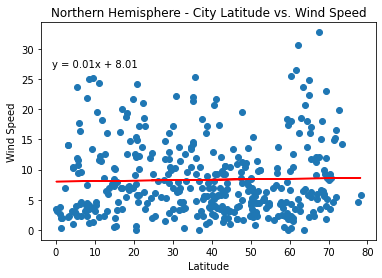

The r-value is: 0.026090635912332148
As city latitude gets further from 0, wind speed decreases.


In [37]:
#Northern Hemisphere Latitude vs Cloudiness
plt.scatter(north_df['Latitude'],north_df['Wind Speed'])
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Latitude'],north_df['Wind Speed'])
regress_values = north_df['Latitude'] * slope + intercept
plt.plot(north_df['Latitude'], regress_values, "r-")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-1,27))
plt.savefig('output_data/fig11.png')
plt.show()
print(f"The r-value is: {rvalue}")
print("As city latitude gets further from 0, wind speed decreases.")

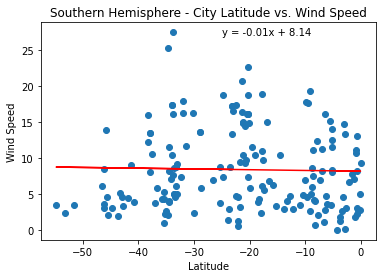

The r-value is: -0.026099121930094525
As city latitude gets closer to 0, wind speed decreases.


In [38]:
#Southern Hemisphere Latitude vs Cloudiness
plt.scatter(south_df['Latitude'],south_df['Wind Speed'])
plt.title("Southern Hemisphere - City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Latitude'],south_df['Wind Speed'])
regress_values = south_df['Latitude'] * slope + intercept
plt.plot(south_df['Latitude'], regress_values, "r-")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-25,27))
plt.savefig('output_data/fig12.png')
plt.show()
print(f"The r-value is: {rvalue}")
print("As city latitude gets closer to 0, wind speed decreases.")